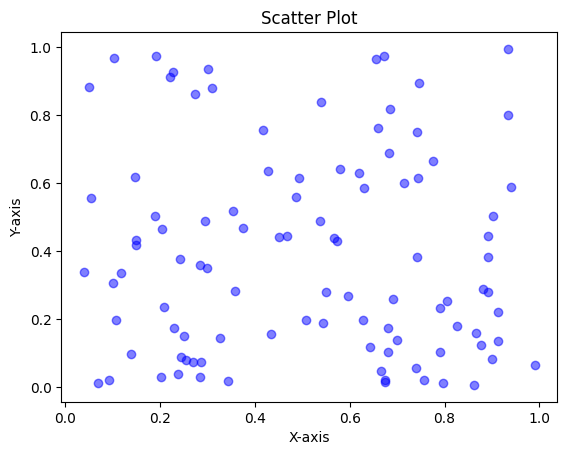

In [49]:
#Scatter Plot

import matplotlib.pyplot as plt
import numpy as np

# Generate random data
x = np.random.rand(100)
y = np.random.rand(100)

# Create scatter plot
plt.scatter(x, y, c='blue', alpha=0.5)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot')
plt.show()

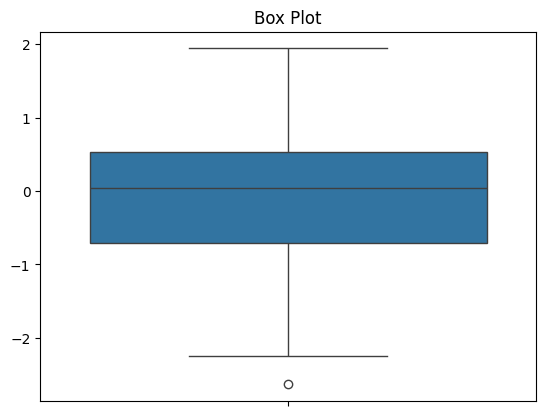

In [50]:
#Box Plot

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Generate random data
data = np.random.randn(100)

# Create box plot
sns.boxplot(data=data)
plt.title('Box Plot')
plt.show()

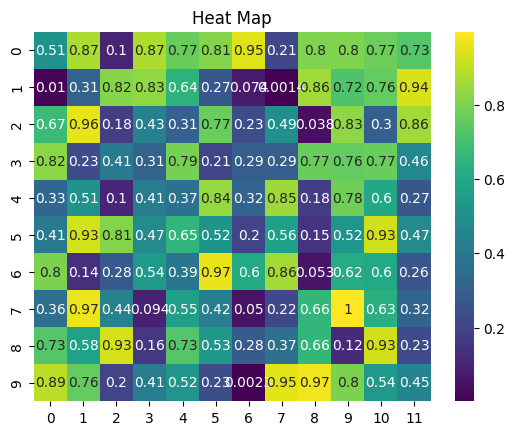

In [51]:
#Heat Map

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Generate random data
data = np.random.rand(10, 12)

# Create heat map
sns.heatmap(data, annot=True, cmap='viridis')
plt.title('Heat Map')
plt.show()

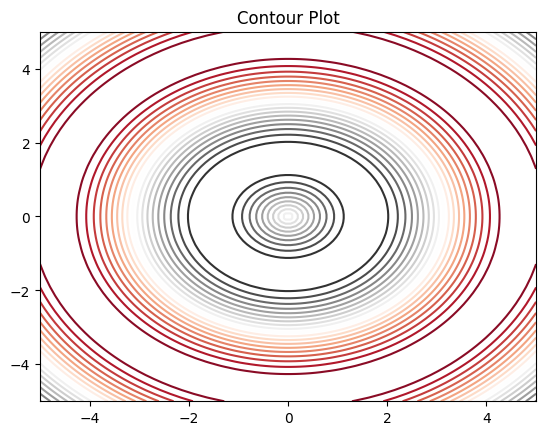

In [52]:
#Counter Plot

import matplotlib.pyplot as plt
import numpy as np

# Generate data
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2 + Y**2))

# Create contour plot
plt.contour(X, Y, Z, levels=20, cmap='RdGy')
plt.title('Contour Plot')
plt.show()

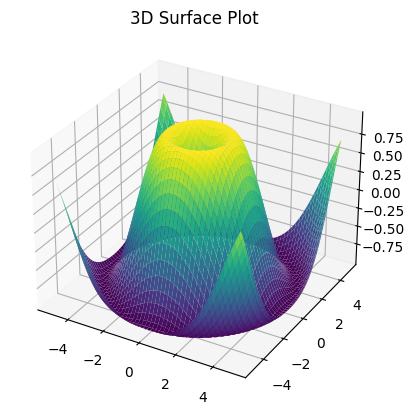

In [53]:
#3D Plot

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Generate data
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2 + Y**2))

# Create 3D surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_title('3D Surface Plot')
plt.show()

***BFS***

In [ ]:
def bfs(graph,s,g,heuri,path=[]):
  open=[(0,s)]
  closed=set()
  closed.add(s)

  while open:
    open.sort(key=lambda x:heuri[x[1]],reverse=True)
    cost,n=open.pop()
    path.append(n)

    if n==g:
      return cost,path

    closed.add(n)
    for ngh,ngh_cost in graph[n]:
      if ngh not in closed:
        closed.add(ngh)
        open.append((ngh_cost+cost,ngh))
  return None

# H={'A':3,'B':4,'C':2,'D':6,'S':5,'G':0}

# graph = {
#     'S': [('A', 1), ('G', 10)],
#     'A': [('B', 2), ('C', 1)],
#     'B': [('D', 5)],
#     'C': [('D', 3),('G', 4)],
#     'D': [('G', 2)],
# }
# res=bfs(graph,'S','G',H)
# print(res)

H = {'A': 40,'B': 32,'C': 25,'D': 35,'E': 19,'F': 17,'G': 0,'H': 10}

graph = {
    'A': [('B', 11), ('C', 14), ('D',7)],
    'B': [('A', 11), ('E', 15)],
    'C': [('A', 14), ('E', 8), ('D',18), ('F',10)],
    'D': [('A', 7), ('F', 25), ('C',18)],
    'E': [('B', 15), ('C', 8), ('H',9)],
    'F': [('G', 20), ('C', 10), ('D',25)],
    'H': [('E',9), ('G',10)]
}

res=bfs(graph,'A','G',H)
print(res)

(44, ['A', 'C', 'F', 'G'])


***A Star Algorithm***

In [ ]:
def h(n):
  H = {'A': 40,'B': 32,'C': 25,'D': 35,'E': 19,'F': 17,'G': 0,'H': 10}
  # H={'A':3,'B':4,'C':2,'D':6,'S':5,'G':0}
  return H[n]

def a_star(graph,s,goal):
  open_list=[(0,s)]
  closed_list=set()
  g={s:0}
  p={s:s}

  while open_list:
    open_list.sort(key=lambda v: g[v[1]]+h(v[1]),reverse=True)
    cost,n=open_list.pop()

    if n==goal:
      path=[]
      while p[n]!=n:
        path.append(n)
        n=p[n]
      path.append(s)
      path.reverse()
      return path,cost

    else:
      for (m,wt) in graph[n]:
        if m not in open_list and m not in closed_list:
          open_list.append((g[n] + wt, m))
          p[m]=n
          g[m]=g[n]+wt
        else:
          if g[m]>g[n]+wt:
              p[m]=n
              g[m]=g[n]+wt
              if m in closed_list:
                closed_list.remove(m)
                open_list.append((g[m], m))

      closed_list.add(n)

  print("Path Not Found")

# graph = {
#     'S': [('A', 1), ('G', 10)],
#     'A': [('B', 2), ('C', 1)],
#     'B': [('D', 5)],
#     'C': [('D', 3),('G', 4)],
#     'D': [('G', 2)]
# }
# res=a_star(graph,'S','G')
# print(res)

graph = {
    'A': [('B', 11), ('C', 14), ('D',7)],
    'B': [('A', 11), ('E', 15)],
    'C': [('A', 14), ('E', 8), ('D',18), ('F',10)],
    'D': [('A', 7), ('F', 25), ('C',18)],
    'E': [('B', 15), ('C', 8), ('H',9)],
    'F': [('G', 20), ('C', 10), ('D',25)],
    'H': [('E',9), ('G',10)]
}

res=a_star(graph,'A','G')
print(res)

# user input for start and goal
# inp=input('Enter start and goal ').split()
# s=inp[0]
# g=inp[1]

(['A', 'C', 'E', 'H', 'G'], 41)


***MiniMax***

In [ ]:
MAX,MIN=1000,-1000

def minimax(depth,nodeInd,maxy,values,alpha,beta):

  if depth==3:
    return values[nodeInd]

  if maxy:
    best=MIN
    for i in range(0,2):
      val=minimax(depth+1,nodeInd*2+i,False,values,alpha,beta)
      best=max(best,val)
      alpha=max(alpha,best)
    return best
  else:
    best=MAX
    for i in range(0,2):
      val=minimax(depth+1,nodeInd*2+i,True,values,alpha,beta)
      best=min(best,val)
      beta=min(beta,best)
    return best

values=[2,3,5,9,0,1,7,5]
print(minimax(0,0,True,values,MIN,MAX))

3


***Alpha Beta***

In [ ]:
MAX,MIN=1000,-1000

def minimax(depth,nodeInd,maxy,values,alpha,beta):

  if depth==3:
    return values[nodeInd]

  if maxy:
    best=MIN
    for i in range(0,2):
      val=minimax(depth+1,nodeInd*2+i,False,values,alpha,beta)
      best=max(best,val)
      alpha=max(alpha,best)

      if beta<=alpha:
        break

    return best
  else:
    best=MAX
    for i in range(0,2):
      val=minimax(depth+1,nodeInd*2+i,True,values,alpha,beta)
      best=min(best,val)
      beta=min(beta,best)

      if beta<=alpha:
        break

    return best

values=[2,3,5,9,0,1,7,5]
print(minimax(0,0,True,values,MIN,MAX))

3


***Naive Bayes***

In [48]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

df=pd.read_csv('/content/titanic.csv')
df=df[['Survived','Pclass','Age','SibSp','Parch','Fare','Embarked']]

imp=SimpleImputer(strategy='median')
df[['Age','Fare']]=imp.fit_transform(df[['Age','Fare']])

df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)
df['Embarked']=LabelEncoder().fit_transform(df['Embarked'])

X=df.drop('Survived',axis=1)
y=df['Survived']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=11)

gnb=GaussianNB()
gnb.fit(X_train,y_train)
y_pred=gnb.predict(X_test)

print('Accuracy Score',accuracy_score(y_test,y_pred))

Accuracy Score 0.7126865671641791


***KNN***

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

df=pd.read_csv('/content/glass.csv')

X=df.drop('Type',axis=1)
y=df['Type']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=11)

knn=KNeighborsClassifier(n_neighbors=5,metric='euclidean') # similarly for manhattan
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

print('Accuracy Score',accuracy_score(y_test,y_pred))

Accuracy Score 0.47692307692307695


***Decision Tree***

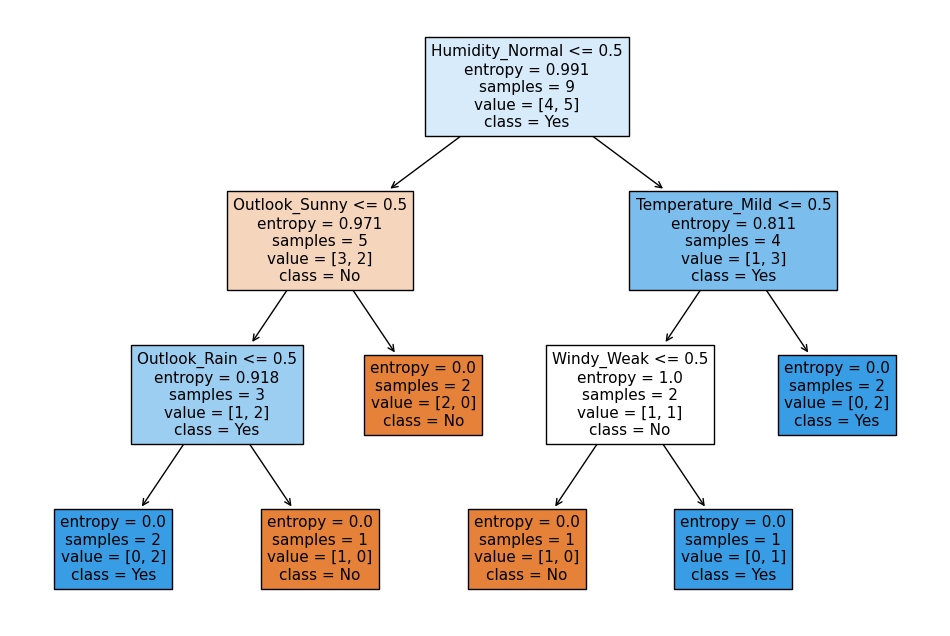

Accuracy Score 0.6


In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree

df=pd.read_csv('/content/weather.csv')

df=pd.get_dummies(df,drop_first=True)

X=df.drop('Play_Yes',axis=1)
y=df['Play_Yes']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

dt=DecisionTreeClassifier(criterion='entropy', random_state=42) # similarly for gini
dt.fit(X_train,y_train)

plt.figure(figsize=(12,8))
plot_tree(dt,filled=True,feature_names=X.columns,class_names=['No','Yes'])
plt.show()

y_pred=dt.predict(X_test)

print('Accuracy Score',accuracy_score(y_test,y_pred))

***KMeans***

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


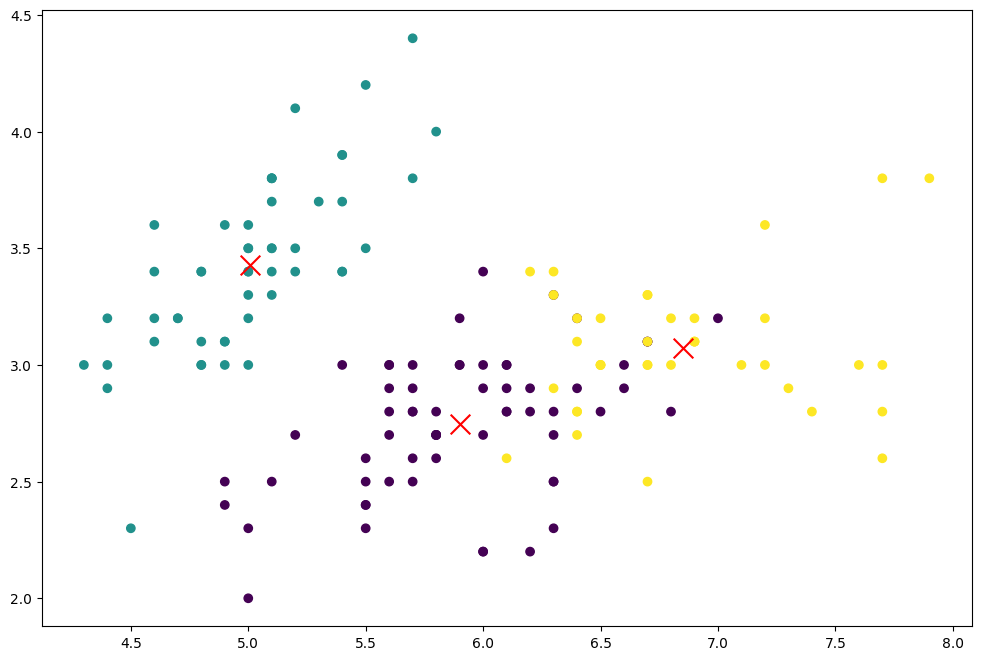

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

X=load_iris().data
K=3

km=KMeans(n_clusters=K,random_state=0)
labels=km.fit_predict(X)
centroids=km.cluster_centers_

print(labels)
print()
print(centroids)

plt.figure(figsize=(12,8))
plt.scatter(X[:,0],X[:,1],c=labels)
plt.scatter(centroids[:,0],centroids[:,1],marker='x',color='red',s=200)
plt.show()

***Agglomerative***

[[0.         0.53851648 0.50990195 0.64807407 0.14142136 0.6164414 ]
 [0.53851648 0.         0.3        0.33166248 0.60827625 1.09087121]
 [0.50990195 0.3        0.         0.24494897 0.50990195 1.08627805]
 [0.64807407 0.33166248 0.24494897 0.         0.64807407 1.16619038]
 [0.14142136 0.60827625 0.50990195 0.64807407 0.         0.6164414 ]
 [0.6164414  1.09087121 1.08627805 1.16619038 0.6164414  0.        ]]



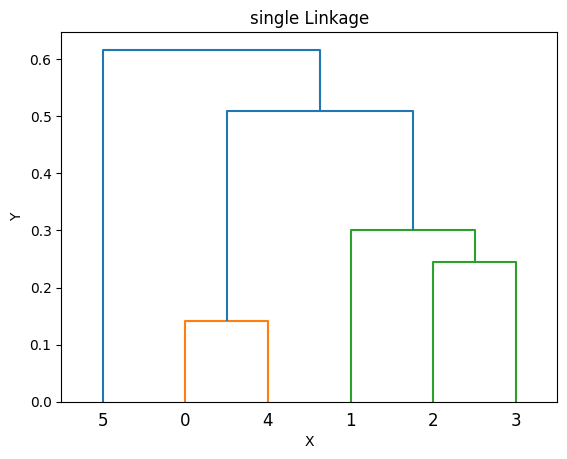

None



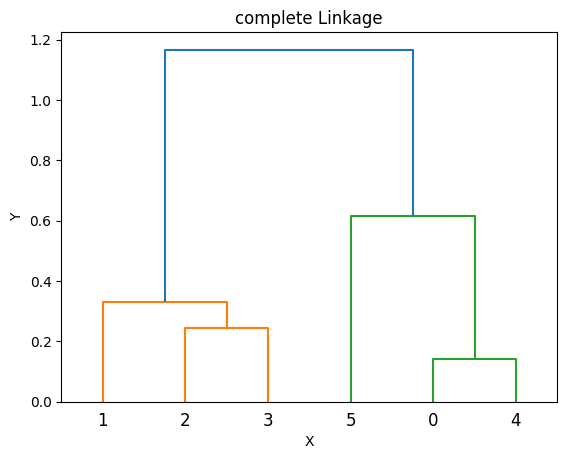

None


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram,linkage

data=load_iris().data[:6]

def proximity_matrix(data):
  n=data.shape[0]
  proximity_mat=np.zeros((n,n))
  for i in range(n):
    for j in range(i+1,n):
      proximity_mat[i,j]=np.linalg.norm(data[i]-data[j])
      proximity_mat[j,i]=proximity_mat[i,j]
  return proximity_mat

def plot_dendro(data,method):
  dendrogram(linkage(data,method=method))
  plt.title(f'{method} Linkage')
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.show()

print(proximity_matrix(data))
print()
print(plot_dendro(data,'single'))
print()
print(plot_dendro(data,'complete'))

***PCA***

Shape before PCA:  (150, 4)
Shape after PCA:  (150, 2)


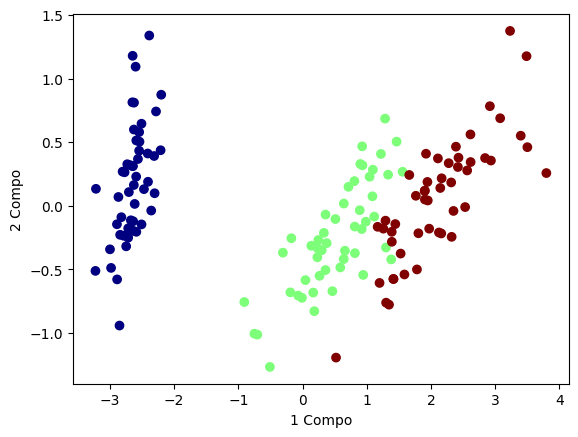

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

X=load_iris().data
y=load_iris().target

pca=PCA(n_components=2)
x_proj=pca.fit_transform(X)

print('Shape before PCA: ',X.shape)
print('Shape after PCA: ',x_proj.shape)

pc1=x_proj[:,0]
pc2=x_proj[:,1]

plt.scatter(pc1,pc2,c=y,cmap='jet')
plt.xlabel('1 Compo')
plt.ylabel('2 Compo')
plt.show()

***LDA***

Shape before PCA:  (150, 4)
Shape after PCA:  (150, 2)


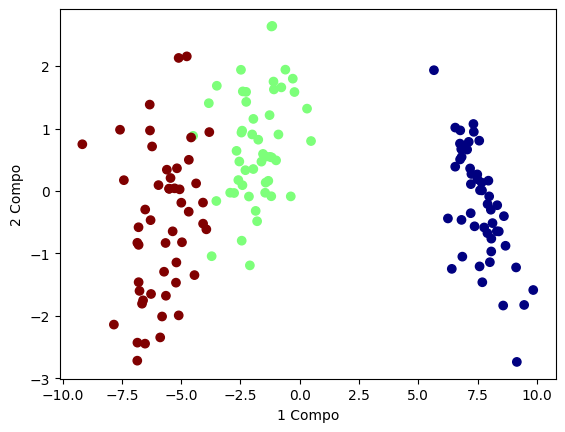

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

X=load_iris().data
y=load_iris().target

lda=LDA(n_components=2)
x_proj=lda.fit_transform(X,y)

print('Shape before PCA: ',X.shape)
print('Shape after PCA: ',x_proj.shape)

ld1=x_proj[:,0]
ld2=x_proj[:,1]

plt.scatter(ld1,ld2,c=y,cmap='jet')
plt.xlabel('1 Compo')
plt.ylabel('2 Compo')
plt.show()